<h2> Начальный анализ 

In [3]:
# импорт пакетов
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [4]:
df = pd.read_csv("student_data.csv") #импорт данных
df.head() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100))) #Процентный список пропущенных данных 
    #Так как пропущенных данных нет, отбрасывать строк не стоит

school - 0%
sex - 0%
age - 0%
address - 0%
famsize - 0%
Pstatus - 0%
Medu - 0%
Fedu - 0%
Mjob - 0%
Fjob - 0%
reason - 0%
guardian - 0%
traveltime - 0%
studytime - 0%
failures - 0%
schoolsup - 0%
famsup - 0%
paid - 0%
activities - 0%
nursery - 0%
higher - 0%
internet - 0%
romantic - 0%
famrel - 0%
freetime - 0%
goout - 0%
Dalc - 0%
Walc - 0%
health - 0%
absences - 0%
G1 - 0%
G2 - 0%
G3 - 0%


 <h2> Детальный анализ EDA

In [6]:
df.dtypes #типы данных столбцов

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [16]:
df['internet'].value_counts() #показатель наличия интернета дома

yes    329
no      66
Name: internet, dtype: int64

In [17]:
Q1 = df['absences'].quantile(0.25)
Q3 = df['absences'].quantile(0.75)
IQR = Q3 - Q1
print("первый квантиль по пропускам студентов:" ,Q1)
print("третий квартиль по пропускам студентов:" ,Q3)
print("межквартальный размах по пропускам студентов:" ,IQR) 


первый квантиль по пропускам студентов: 0.0
третий квартиль по пропускам студентов: 8.0
межквартальный размах по пропускам студентов: 8.0


In [9]:
import pandas as pd
df = pd.read_csv("student_data.csv")
print("среднее количество пропусков: ", df['absences'].mean())

среднее количество пропусков:  5.708860759493671


In [10]:
df['sex'].value_counts() #количество мужчин и женщин

F    208
M    187
Name: sex, dtype: int64

In [11]:
df['address'].value_counts() #показатель по проживанию "U "в городе/ "R"в селе

U    307
R     88
Name: address, dtype: int64

In [12]:
col_counts = dict(df.count(axis=0))
col_types = {c: d for c, d in dict(df.dtypes).items()   if col_counts[c] > 10 }
_is_num = lambda x: x in (np.int64, float)
cols_numerical = sorted([col for col, dtp in col_types.items() if _is_num(dtp)])
cols_string = sorted([col for col, dtp in col_types.items() if not _is_num(dtp)])
print(f"численные данные: {cols_numerical}")
print(f"Категориальные данные: {cols_string}")
#показать числленные и категориальные данные раздельно

численные данные: ['Dalc', 'Fedu', 'G1', 'G2', 'G3', 'Medu', 'Walc', 'absences', 'age', 'failures', 'famrel', 'freetime', 'goout', 'health', 'studytime', 'traveltime']
Категориальные данные: ['Fjob', 'Mjob', 'Pstatus', 'activities', 'address', 'famsize', 'famsup', 'guardian', 'higher', 'internet', 'nursery', 'paid', 'reason', 'romantic', 'school', 'schoolsup', 'sex']


<Axes: xlabel='absences'>

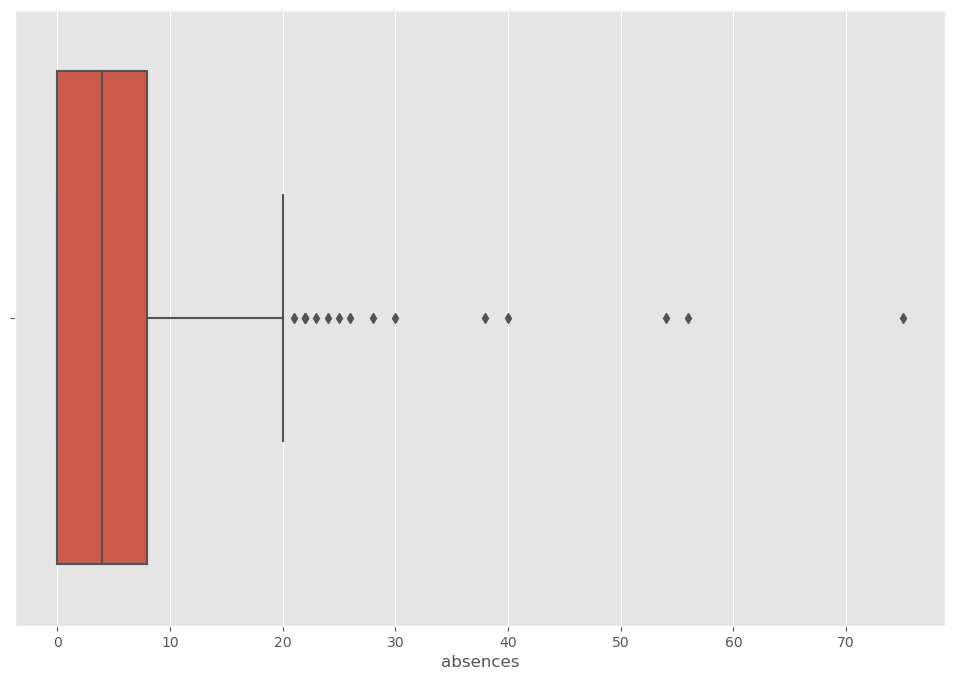

In [7]:
sns.boxplot(x=df['absences']) #определение выбросов по данным пропусков студентов

<h2> Визуализация данных

<h3>Графики распределения

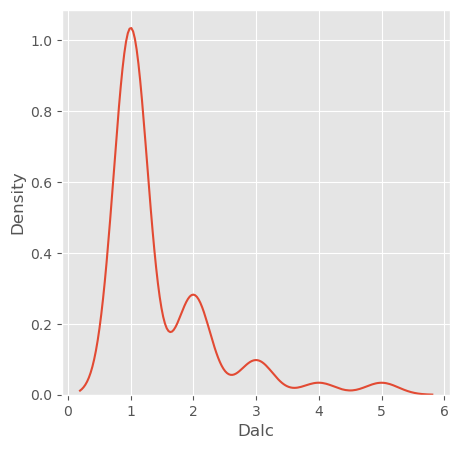

Dalc 
 1    276
2     75
3     26
5      9
4      9
Name: Dalc, dtype: int64


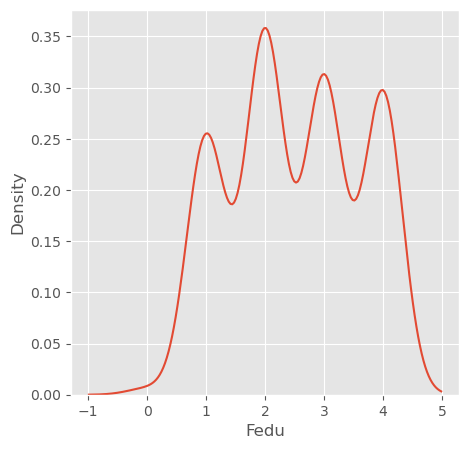

Fedu 
 2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64


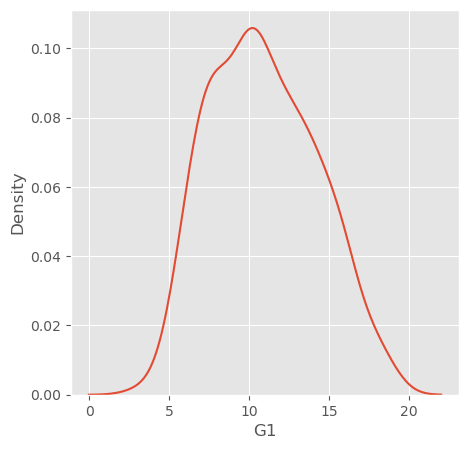

G1 
 10    51
8     41
11    39
7     37
12    35
13    33
9     31
14    30
15    24
6     24
16    22
18     8
17     8
5      7
19     3
4      1
3      1
Name: G1, dtype: int64


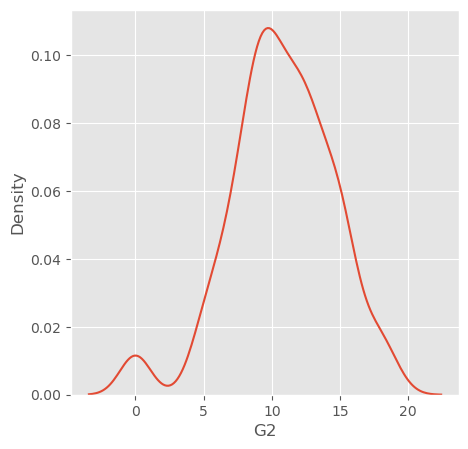

G2 
 9     50
10    46
12    41
13    37
11    35
15    34
8     32
14    23
7     21
5     15
6     14
16    13
0     13
18    12
17     5
19     3
4      1
Name: G2, dtype: int64


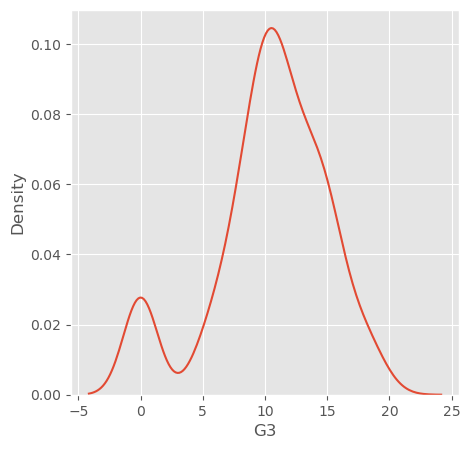

G3 
 10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: G3, dtype: int64


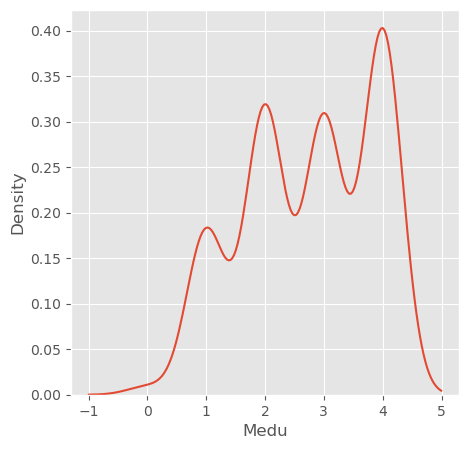

Medu 
 4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64


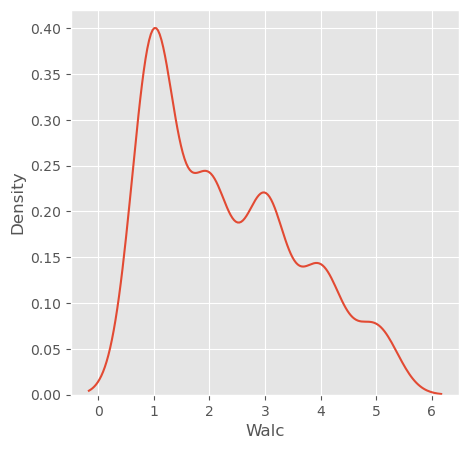

Walc 
 1    151
2     85
3     80
4     51
5     28
Name: Walc, dtype: int64


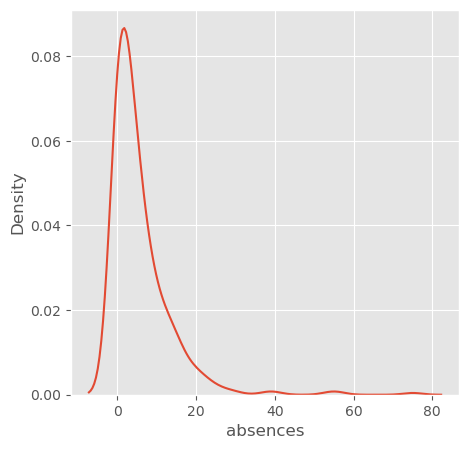

absences 
 0     115
2      65
4      53
6      31
8      22
10     17
14     12
12     12
3       8
16      7
7       7
5       5
18      5
20      4
11      3
9       3
13      3
15      3
22      3
1       3
38      1
30      1
40      1
23      1
19      1
28      1
75      1
21      1
24      1
56      1
26      1
54      1
25      1
17      1
Name: absences, dtype: int64


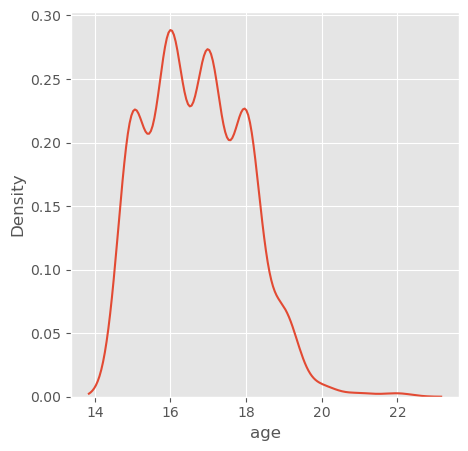

age 
 16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64


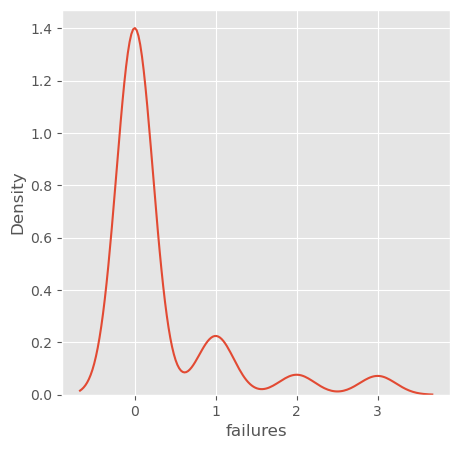

failures 
 0    312
1     50
2     17
3     16
Name: failures, dtype: int64


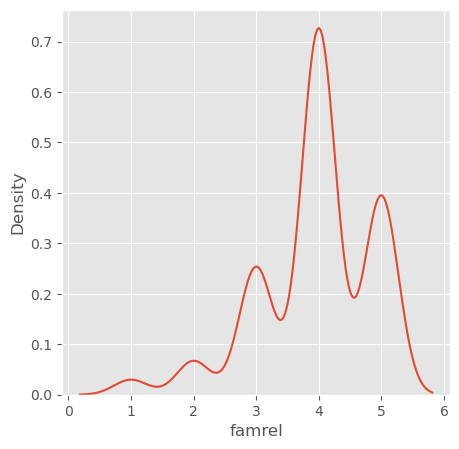

famrel 
 4    195
5    106
3     68
2     18
1      8
Name: famrel, dtype: int64


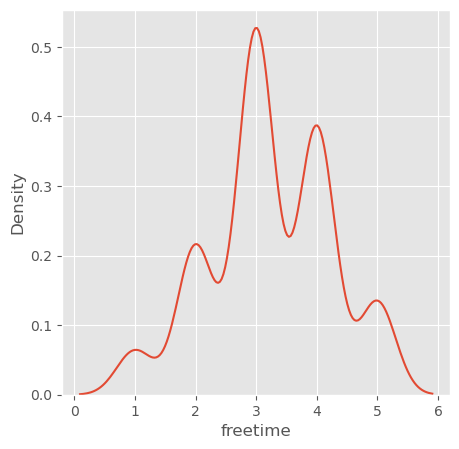

freetime 
 3    157
4    115
2     64
5     40
1     19
Name: freetime, dtype: int64


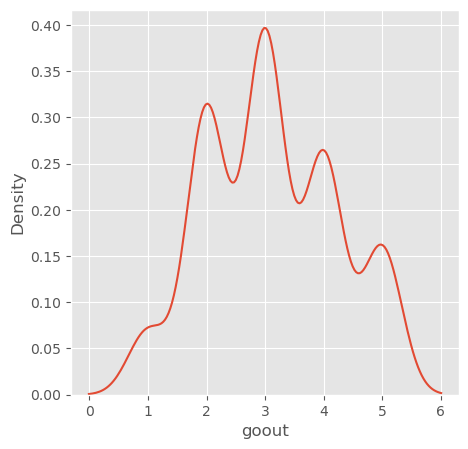

goout 
 3    130
2    103
4     86
5     53
1     23
Name: goout, dtype: int64


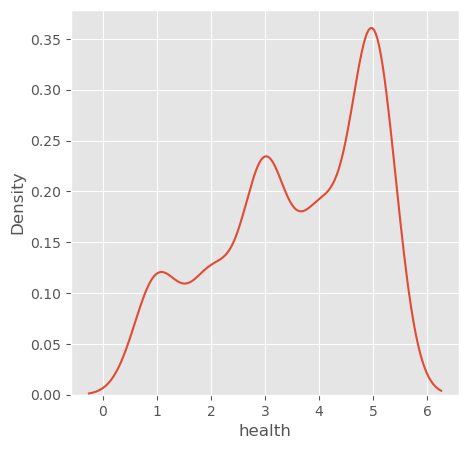

health 
 5    146
3     91
4     66
1     47
2     45
Name: health, dtype: int64


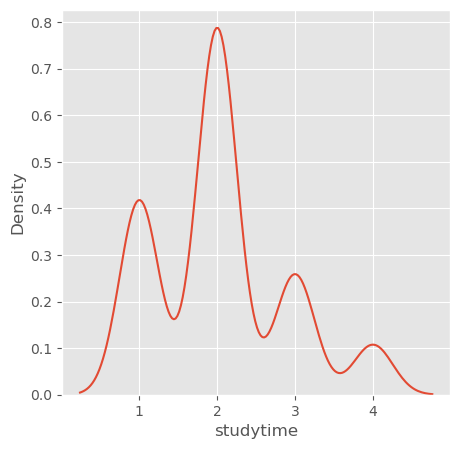

studytime 
 2    198
1    105
3     65
4     27
Name: studytime, dtype: int64


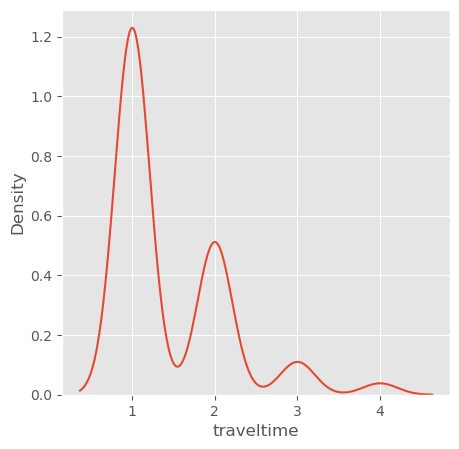

traveltime 
 1    257
2    107
3     23
4      8
Name: traveltime, dtype: int64


In [75]:
def hist_plot(col_2):
        plt.figure(figsize=(5,5))
        sns.kdeplot(data=df, x=col_2)

        plt.show()
        print(col_2,"\n",df[col_2].value_counts())
# Print
for i in cols_numerical:
        hist_plot(i)
        

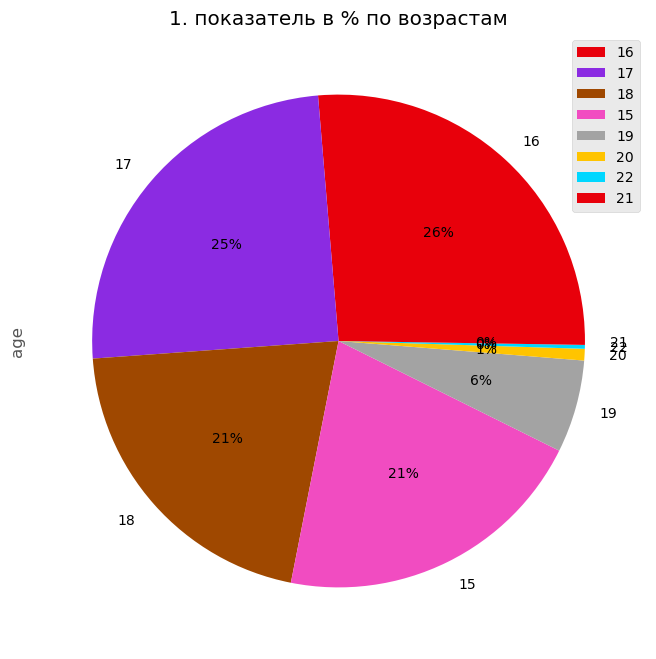

In [57]:
plt.figure(figsize=(10,8))
colors = sns.color_palette('bright')[3:12]
df.age.value_counts().plot(kind='pie', autopct='%.0f%%', colors = colors)
plt.title('1. показатель в % по возрастам')
plt.legend()

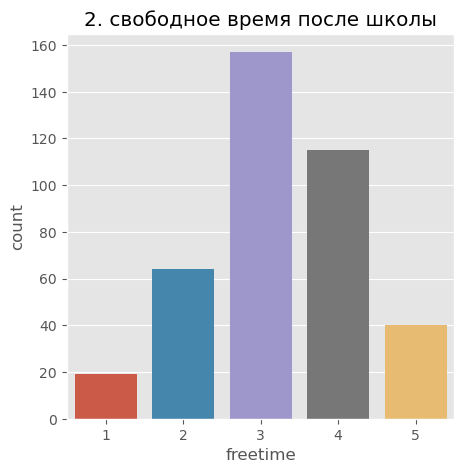

freetime 
 3    157
4    115
2     64
5     40
1     19
Name: freetime, dtype: int64


In [56]:
col_1=[ "freetime"]
def count_plot(col_1):
        plt.figure(figsize=(5,5))
        sns.countplot(x=col_1,data=df)
        plt.title("2. свободное время после школы")
        plt.show()
        print(col_1,"\n",df[col_1].value_counts())
# Print
for i in col_1:
        count_plot(i)
# свободное время после школы, от 1 - очень низкое до 5 - очень высокое

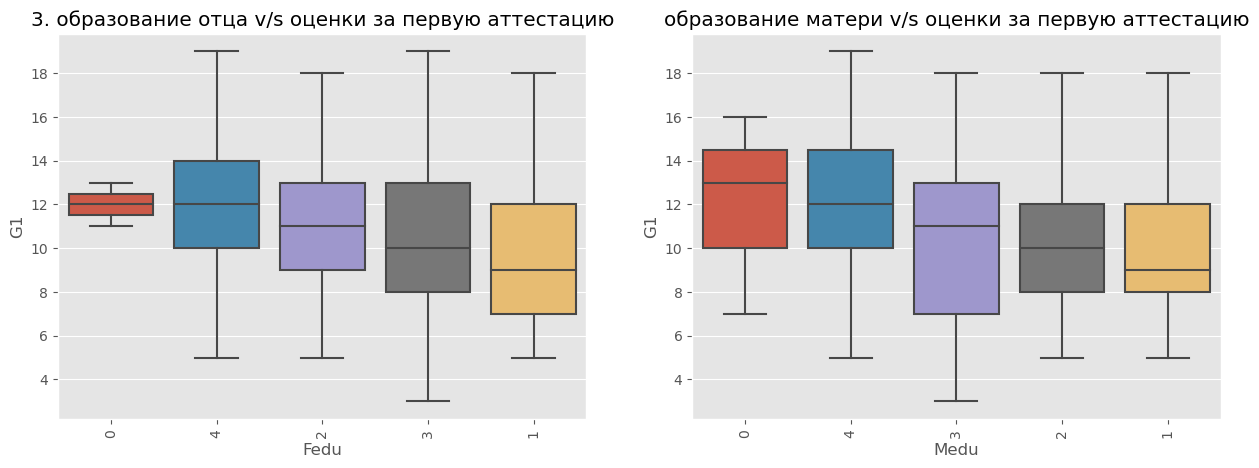

In [55]:
plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
order_by = df.groupby('Fedu')['G1'].median().sort_values(ascending = False).index
sns.boxplot(x = df['Fedu'], y = df['G1'],order = order_by)
plt.xticks(rotation = 90)
plt.title('3. образование отца v/s оценки за первую аттестацию')

plt.subplot(1,2,2)
order_by = df.groupby('Medu')['G1'].median().sort_values(ascending = False).index
sns.boxplot(x = df['Medu'], y = df['G1'],order = order_by)
plt.xticks(rotation = 90)
plt.title('образование матери v/s оценки за первую аттестацию')

plt.show()

<h3>Вывод из 3-диаграммы: Образование родителей влияет на оценки своих детей. Чем больше образованы родители, тем выше оченки ученика

Text(0.5, 1.0, '4. влияет ли наличие интенета на учебное время?')

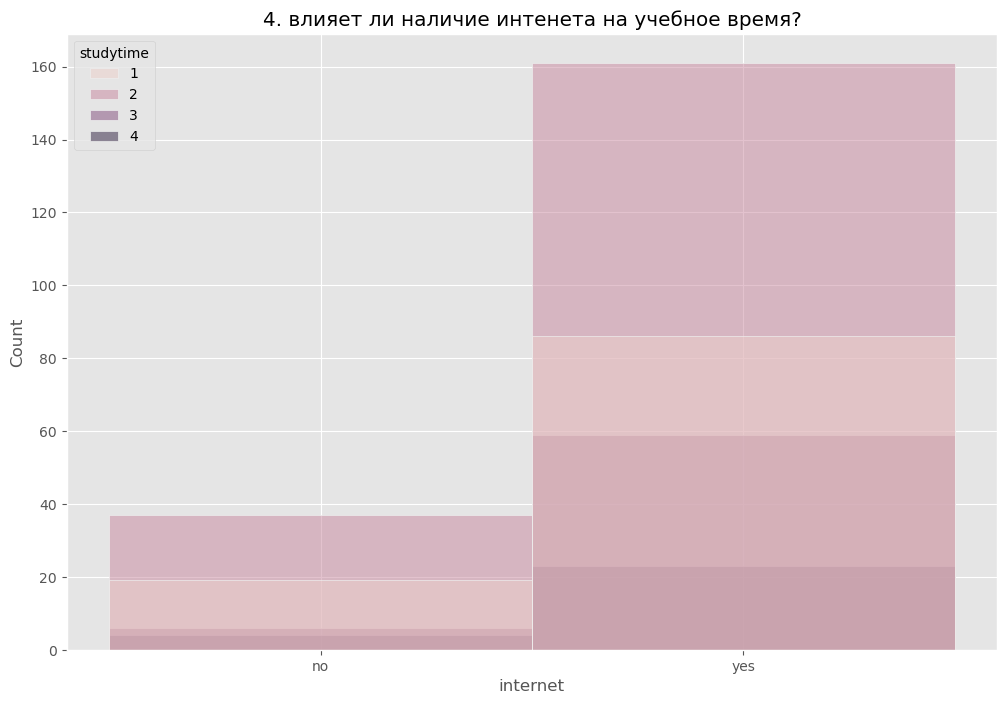

In [69]:
sns.histplot(x="internet", hue="studytime",data=df)
plt.title("4. влияет ли наличие интенета на учебное время?")

<h3>Вывод из 4-диаграммы: Наличие интернета влияет учебное время. Из диаграммы видно, что многие ученики используют интернет для учебы. Лишь некоторые используют для других целей.

[Text(0.5, 1.0, '5. пропуски vs итоговая оценка')]

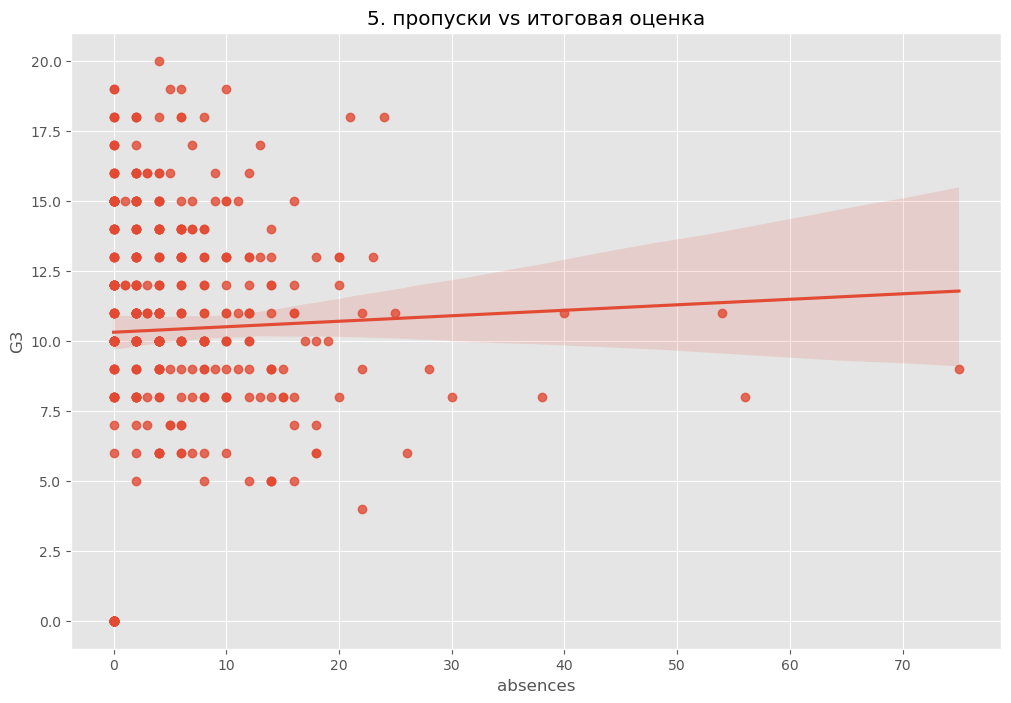

In [72]:
sns.regplot(x='absences', y='G3', data=df).set(title='5. пропуски vs итоговая оценка')

<h3>Из 5-диаграммы видно, что между пропусками и итоговой оценки учащихся нет никакой корелляции.